# Random Forest Project 


### Import Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

### Import dataset

In [2]:
data = pd.read_csv("C:/Users/soura/OneDrive/Desktop/Vaibhav DS/Datasets/Fraud_check.csv")
print(data)

    Undergrad Marital.Status  Taxable.Income  City.Population  \
0          NO         Single           68833            50047   
1         YES       Divorced           33700           134075   
2          NO        Married           36925           160205   
3         YES         Single           50190           193264   
4          NO        Married           81002            27533   
..        ...            ...             ...              ...   
595       YES       Divorced           76340            39492   
596       YES       Divorced           69967            55369   
597        NO       Divorced           47334           154058   
598       YES        Married           98592           180083   
599        NO       Divorced           96519           158137   

     Work.Experience Urban  
0                 10   YES  
1                 18   YES  
2                 30   YES  
3                 15   YES  
4                 28    NO  
..               ...   ...  
595             

### Check Data Information

In [3]:
data.head(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
data.tail(5)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO
599,NO,Divorced,96519,158137,16,NO


In [5]:
df = data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.3+ KB


In [7]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [8]:
df.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [9]:
df['Work.Experience'].value_counts()

10    31
13    28
30    25
28    25
12    25
14    24
11    23
21    23
5     22
27    22
26    22
7     21
29    21
19    21
16    19
6     19
25    19
2     19
17    18
15    18
24    17
23    16
20    15
0     14
1     14
8     14
3     14
4     14
22    13
9     13
18    11
Name: Work.Experience, dtype: int64

### Data Visualisation

<Figure size 2000x1000 with 0 Axes>

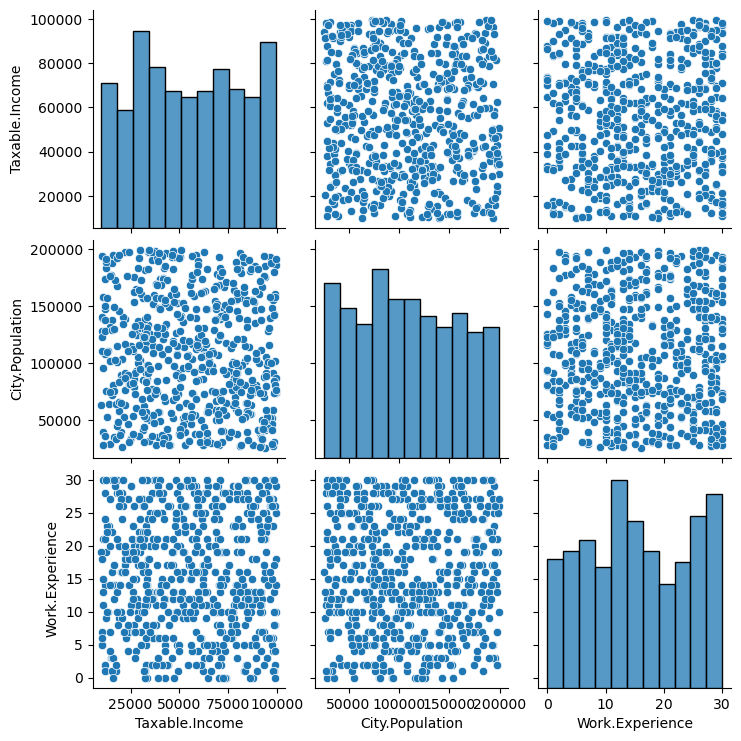

In [10]:
plt.figure(figsize = (20,10))
sns.pairplot(data = df)
plt.show()

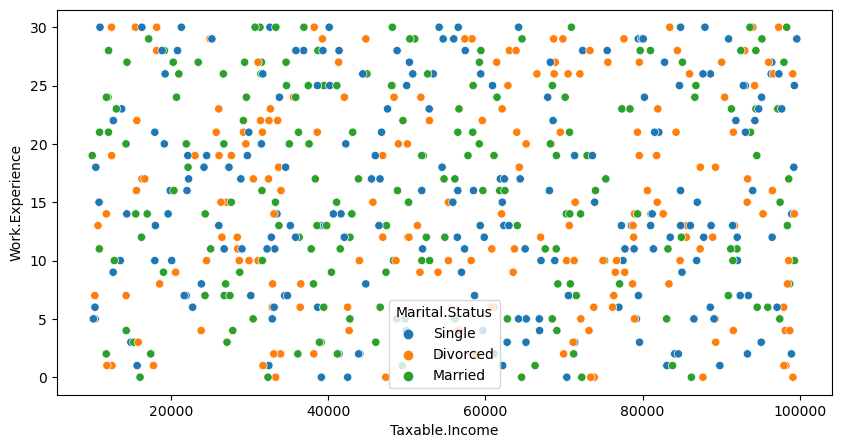

In [11]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=df['Taxable.Income'],y=df['Work.Experience'],hue=df['Marital.Status'],data=df) 
plt.show()

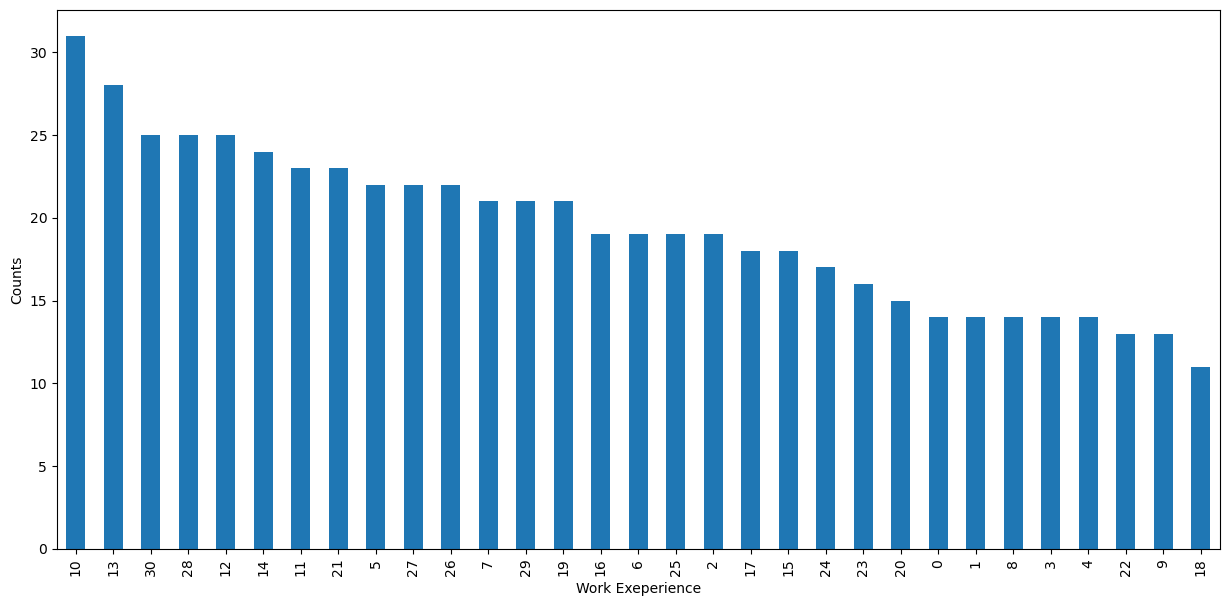

In [12]:
plt.figure(figsize=(15,7))
df['Work.Experience'].value_counts().plot(kind="bar")
plt.xlabel("Work Exeperience")
plt.ylabel("Counts")
plt.show()

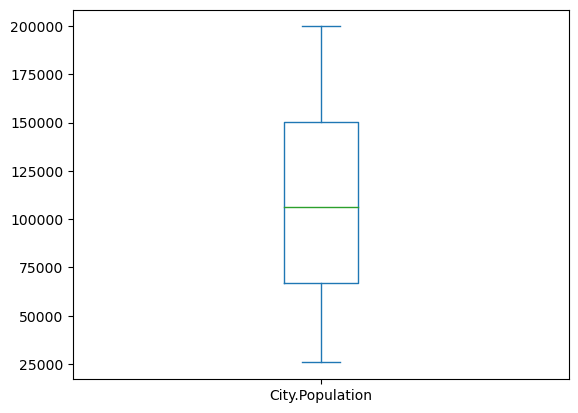

In [13]:
df['City.Population'].plot(kind="box")
plt.show()

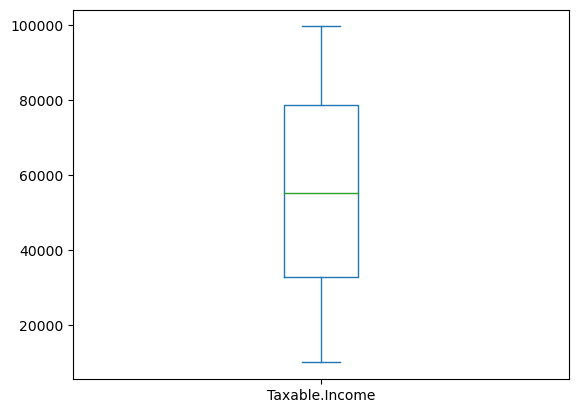

In [14]:
df['Taxable.Income'].plot(kind="box")
plt.show()

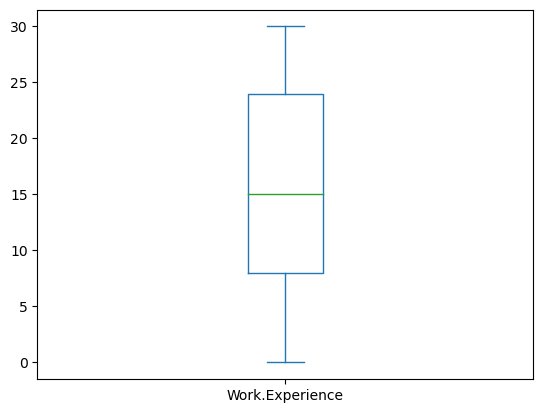

In [15]:
df['Work.Experience'].plot(kind="box")
plt.show()

### Encodind The Data

In [16]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Undergrad_le'] = le.fit_transform(df['Undergrad'])
df['Marital_Status'] = le.fit_transform(df['Marital.Status'])
df['Urban_lr'] = le.fit_transform(df['Urban'])

In [18]:
Taxabale_Income = []
for value in df['Taxable.Income']:
    if value<=30000:
        Taxabale_Income.append("Risky")
    else:
        Taxabale_Income.append("Good")

df["Taxable_Income"]= Taxabale_Income

In [19]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,Undergrad_le,Marital_Status,Urban_lr,Taxable_Income
0,NO,Single,68833,50047,10,YES,0,2,1,Good
1,YES,Divorced,33700,134075,18,YES,1,0,1,Good
2,NO,Married,36925,160205,30,YES,0,1,1,Good
3,YES,Single,50190,193264,15,YES,1,2,1,Good
4,NO,Married,81002,27533,28,NO,0,1,0,Good
...,...,...,...,...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES,1,0,1,Good
596,YES,Divorced,69967,55369,2,YES,1,0,1,Good
597,NO,Divorced,47334,154058,0,YES,0,0,1,Good
598,YES,Married,98592,180083,17,NO,1,1,0,Good


In [20]:
df['Taxable_Income'].value_counts()

Good     476
Risky    124
Name: Taxable_Income, dtype: int64

### Separating  data into X and Y

In [21]:
X = df.drop(['Undergrad','Marital.Status','Taxable.Income','Urban','Taxable_Income'],axis = 1)
y = df['Taxable_Income']

In [22]:
X

,City.Population,Work.Experience,Undergrad_le,Marital_Status,Urban_lr
0,50047,10,0,2,1
1,134075,18,1,0,1
2,160205,30,0,1,1
3,193264,15,1,2,1
4,27533,28,0,1,0
...,...,...,...,...,...
595,39492,7,1,0,1
596,55369,2,1,0,1
597,154058,0,0,0,1
598,180083,17,1,1,0


In [23]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable_Income, Length: 600, dtype: object

### Splitting data into Train and Test

In [24]:
### Splitting the Data set into Train and test
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size= 0.3,random_state=42)
print("Independent Training data shape: ", X_train.shape)
print("Independent testing data shape: ", X_test.shape)
print("Dependent Training data shape: ", y_train.shape)
print("Dependent Testing data shape: ", y_test.shape)

Independent Training data shape:  (420, 5)
Independent testing data shape:  (180, 5)
Dependent Training data shape:  (420,)
Dependent Testing data shape:  (180,)


In [25]:
X_test

,City.Population,Work.Experience,Undergrad_le,Marital_Status,Urban_lr
110,32450,19,0,2,1
419,138074,20,0,1,0
565,31064,28,0,0,0
77,118344,26,1,1,0
181,36116,20,0,0,0
...,...,...,...,...,...
54,98207,23,0,0,0
493,103226,29,0,1,0
46,137346,27,1,1,1
93,137676,3,1,1,1


### Model random Forest 

In [26]:
rfc = RandomForestClassifier(n_estimators=1000, criterion='entropy',random_state=42)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=1000, random_state=42)

In [27]:

pred = rfc.predict(X_test)
results = confusion_matrix(y_test,pred)
acc = accuracy_score(y_test,pred)

Classification Report                precision    recall  f1-score   support

        Good       0.79      0.97      0.87       143
       Risky       0.00      0.00      0.00        37

    accuracy                           0.77       180
   macro avg       0.39      0.48      0.43       180
weighted avg       0.63      0.77      0.69       180



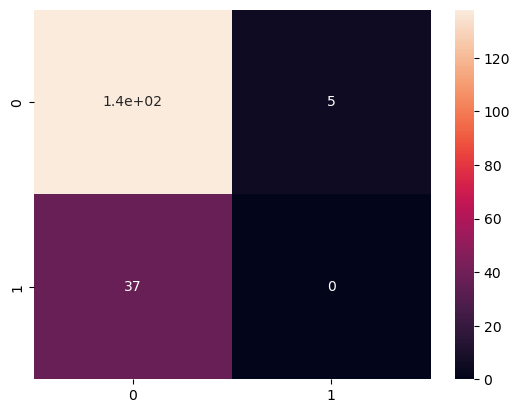

In [28]:
sns.heatmap(results, annot=True)
print('Classification Report ',classification_report(y_test,pred))

In [29]:
print("Random Forest Accuracy is :  ", acc*100)

Random Forest Accuracy is :   76.66666666666667


In [30]:
print(pred)

['Good' 'Good' 'Good' 'Risky' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Risky' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Risky' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good' 'Good'
 'G

In [31]:
print(y_test)

110    Risky
419     Good
565     Good
77      Good
181    Risky
       ...  
54      Good
493    Risky
46      Good
93     Risky
264     Good
Name: Taxable_Income, Length: 180, dtype: object


### Accuracy of Random Forest Classification Model is 76.66 % which means Model is Fitted very well.

In [32]:
import joblib

joblib.dump(rfc,'fraud_check_prj_10.sav')

['fraud_check_prj_10.sav']